In [36]:
import h5py
import pandas as pd
import numpy as np

# === paths ===
old_path = "../../ADCNN/data/dataset_creation/old/out/train.h5"
new_path = "../../ADCNN/data/dataset_creation/out/train.h5"
old_csv  = "../../ADCNN/data/dataset_creation/old/out/train.csv"
new_csv  = "../../ADCNN/data/dataset_creation/out/train.csv"

# === compare metadata CSVs ===
df_old = pd.read_csv(old_csv)
df_new = pd.read_csv(new_csv)

print("Old rows:", len(df_old), " | New rows:", len(df_new))
print("Columns identical:", set(df_old.columns) == set(df_new.columns))

# show differences in shared columns
for col in set(df_old.columns) & set(df_new.columns):
    if not np.allclose(df_old[col].values[:10], df_new[col].values[:10], equal_nan=True):
        print(f"Sample diff in {col}:")
        print(" old:", df_old[col].head(3).to_list())
        print(" new:", df_new[col].head(3).to_list())
        break

# === compare image & mask datasets ===
def compare_h5(f1, f2, key):
    with h5py.File(f1, "r") as h5_1, h5py.File(f2, "r") as h5_2:
        d1, d2 = h5_1[key], h5_2[key]
        print(f"{key}: shape old={d1.shape}, new={d2.shape}")
        same_shape = d1.shape == d2.shape
        same_mean  = np.allclose(np.mean(d1[:]), np.mean(d2[:]), rtol=1e-5)
        same_sum   = np.allclose(np.sum(d1[:]), np.sum(d2[:]), rtol=1e-5)
        print(f"  same shape? {same_shape}, mean diff={abs(np.mean(d1[:])-np.mean(d2[:])):.3g}, sum diff={abs(np.sum(d1[:])-np.sum(d2[:])):.3g}")

compare_h5(old_path, new_path, "images")
compare_h5(old_path, new_path, "masks")

# === optional: pixel-wise comparison for first sample ===
with h5py.File(old_path, "r") as f1, h5py.File(new_path, "r") as f2:
    diff = np.abs(f1["images"][0] - f2["images"][0])
    print("Max abs pixel diff (first image):", diff.max())


Old rows: 20  | New rows: 20
Columns identical: True


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [37]:
df_old

,ra,dec,source_type,trail_length,mag,beta,visit,detector,integrated_mag,PSF_mag,physical_filter,x,y,stack_detection,stack_mag,stack_mag_err,image_id
0,53.365015,-28.210996,Trail,51.593709,27.677112,155.621397,2024110900210,6,23.395621,24.472491,u,2540,306,False,NaN,NaN,0
1,53.601521,-28.195371,Trail,21.607601,25.081160,32.198394,2024110900210,6,21.744643,22.408450,u,3627,3899,True,22.407737,0.112558,0
2,53.408232,-28.362871,Trail,8.055179,25.330297,162.888192,2024110900210,6,23.065109,23.357408,u,27,1566,False,NaN,NaN,0
3,53.360915,-28.282880,Trail,26.914035,24.985523,73.110177,2024110900210,6,21.410576,22.173395,u,1266,524,False,NaN,NaN,0
4,53.511783,-28.242436,Trail,54.042379,27.077054,130.242557,2024110900210,6,22.745218,23.845339,u,2494,2695,False,NaN,NaN,0
5,53.463550,-28.344757,Trail,50.375997,24.935286,168.200328,2024110900210,6,20.679727,21.744657,u,535,2349,True,22.247392,0.103465,0
6,53.435828,-28.194151,Trail,17.350983,24.711876,36.657088,2024110900210,6,21.613566,22.183291,u,3079,1334,False,NaN,NaN,0
7,53.554018,-28.289343,Trail,9.580278,21.672175,125.444383,2024110900210,6,19.218729,19.565492,u,1817,3530,True,19.422303,0.010467,0
8,53.457871,-28.295264,Trail,39.898400,25.945720,134.188703,2024110900210,6,21.943332,22.893133,u,1383,2069,True,22.883773,0.194314,0
9,53.419021,-28.227618,Trail,44.238729,24.373867,73.646719,2024110900210,6,20.259361,21.259809,u,2435,1205,False,NaN,NaN,0


In [38]:
df_new

,ra,dec,source_type,trail_length,mag,beta,visit,detector,integrated_mag,PSF_mag,physical_filter,x,y,stack_detection,stack_mag,stack_mag_err,image_id
0,53.365015,-28.210996,Trail,51.593709,27.677112,155.621397,2024110900210,6,23.395621,24.472491,u,2540,306,False,NaN,NaN,0
1,53.601521,-28.195371,Trail,21.607601,25.081160,32.198394,2024110900210,6,21.744643,22.408450,u,3627,3899,True,22.407737,0.112558,0
2,53.408232,-28.362871,Trail,8.055179,25.330297,162.888192,2024110900210,6,23.065109,23.357408,u,27,1566,False,NaN,NaN,0
3,53.360915,-28.282880,Trail,26.914035,24.985523,73.110177,2024110900210,6,21.410576,22.173395,u,1266,524,False,NaN,NaN,0
4,53.511783,-28.242436,Trail,54.042379,27.077054,130.242557,2024110900210,6,22.745218,23.845339,u,2494,2695,False,NaN,NaN,0
5,53.463550,-28.344757,Trail,50.375997,24.935286,168.200328,2024110900210,6,20.679727,21.744657,u,535,2349,True,22.247392,0.103465,0
6,53.435828,-28.194151,Trail,17.350983,24.711876,36.657088,2024110900210,6,21.613566,22.183291,u,3079,1334,False,NaN,NaN,0
7,53.554018,-28.289343,Trail,9.580278,21.672175,125.444383,2024110900210,6,19.218729,19.565492,u,1817,3530,True,19.422303,0.010467,0
8,53.457871,-28.295264,Trail,39.898400,25.945720,134.188703,2024110900210,6,21.943332,22.893133,u,1383,2069,True,22.883774,0.194314,0
9,53.419021,-28.227618,Trail,44.238729,24.373867,73.646719,2024110900210,6,20.259361,21.259809,u,2435,1205,False,NaN,NaN,0


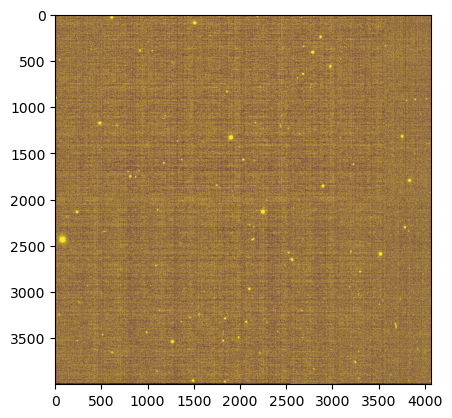

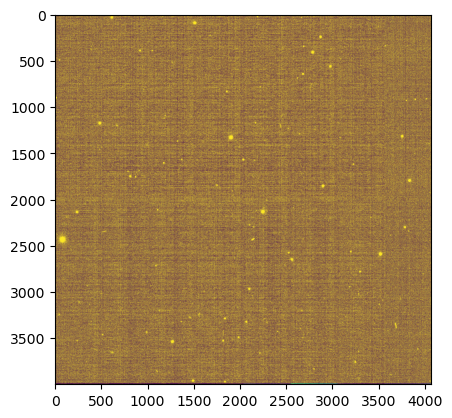

NameError: name 'argmax' is not defined

In [46]:
import matplotlib.pyplot as plt
with h5py.File(old_path, "r") as f1, h5py.File(new_path, "r") as f2:
    plt.imshow(np.tanh(f1["images"][0]))
    plt.show()
    plt.imshow(np.tanh(f2["images"][0]))
    plt.show()
    print (argmax(f1["images"][0] [0, 0] - f2["images"][0] [0, 0]))

In [51]:
with h5py.File(old_path, "r") as f1, h5py.File(new_path, "r") as f2:
    print (np.mean(f1["images"][0] - f2["images"][0]))

-4.5216805e-08


In [7]:
df_old1 = pd.read_csv(old_csv)
df_new1 = pd.read_csv(new_csv)

In [16]:
print (pd.read_csv("../../ADCNN/data/dataset_creation/old/out/test.csv")["visit"].unique())
print (pd.read_csv("../../ADCNN/data/dataset_creation/out/test.csv")["visit"].unique())

[2024110800248 2024120200086 2024112900281 2024111900345 2024120800378
 2024120100157 2024112700177 2024112900292 2024120500120]
[2024112700164 2024120100156 2024120700529 2024120800372 2024120800384
 2024120300072 2024112900226 2024120800347]


In [17]:
print (pd.read_csv("../../ADCNN/data/dataset_creation/old/out/test.csv")["visit"].unique())
print (pd.read_csv("../../ADCNN/data/dataset_creation/out/test.csv")["visit"].unique())

[2024110800248 2024120200086 2024112900281 2024111900345 2024120800378
 2024120100157 2024112700177 2024112900292 2024120500120]
[2024120100171 2024121000368 2024120900464 2024111600113 2024120900402
 2024120700179 2024120800347 2024113000119 2024112300220]


In [9]:
df_new1

,ra,dec,source_type,trail_length,mag,beta,visit,detector,integrated_mag,PSF_mag,physical_filter,x,y,stack_detection,stack_mag,stack_mag_err,image_id
0,95.165734,-24.873462,Trail,51.593709,27.677112,155.621397,2024120700477,8,23.395621,24.556121,z,2540,306,True,22.062186,0.104286,0
1,95.371573,-24.967324,Trail,21.607601,25.081160,32.198394,2024120700477,8,21.744643,22.482887,z,3627,3899,True,22.452996,0.152406,0
2,95.115392,-25.022977,Trail,8.055179,25.330297,162.888192,2024120700477,8,23.065109,23.409436,z,27,1566,False,NaN,NaN,0
3,95.121507,-24.933127,Trail,26.914035,24.985523,73.110177,2024120700477,8,21.410576,22.250918,z,1266,524,True,22.173642,0.116166,0
4,95.270032,-24.966911,Trail,54.042379,27.077054,130.242557,2024120700477,8,22.745218,23.929270,z,2494,2695,True,22.238575,0.122085,0
5,95.171688,-25.032558,Trail,50.375997,24.935286,168.200328,2024120700477,8,20.679727,21.828126,z,535,2349,True,21.937932,0.091718,0
6,95.234240,-24.891146,Trail,17.350983,24.711876,36.657088,2024120700477,8,21.613566,22.253987,z,3079,1334,False,NaN,NaN,0
7,95.278503,-25.026180,Trail,9.580278,21.672175,125.444383,2024120700477,8,19.218729,19.622445,z,1817,3530,False,NaN,NaN,0
8,95.195114,-24.987665,Trail,39.898400,25.945720,134.188703,2024120700477,8,21.943332,22.974809,z,1383,2069,False,NaN,NaN,0
9,95.201237,-24.912176,Trail,44.238729,24.373867,73.646719,2024120700477,8,20.259361,21.342331,z,2435,1205,False,NaN,NaN,0


In [8]:
df_old1

,ra,dec,source_type,trail_length,mag,beta,visit,detector,integrated_mag,PSF_mag,physical_filter,x,y,stack_detection,stack_mag,stack_mag_err,image_id
0,58.852472,-49.006476,Trail,51.593709,27.677112,155.621397,2024121000472,0,23.395621,24.524442,r,2540,306,False,NaN,NaN,0
1,59.134144,-48.909194,Trail,21.607601,25.081160,32.198394,2024121000472,0,21.744643,22.454505,r,3627,3899,False,NaN,NaN,0
2,58.997760,-49.130628,Trail,8.055179,25.330297,162.888192,2024121000472,0,23.065109,23.389238,r,27,1566,True,23.297617,0.217275,0
3,58.890893,-49.073868,Trail,26.914035,24.985523,73.110177,2024121000472,0,21.410576,22.221427,r,1266,524,False,NaN,NaN,0
4,59.052311,-48.983844,Trail,54.042379,27.077054,130.242557,2024121000472,0,22.745218,23.897484,r,2494,2695,False,NaN,NaN,0
5,59.054953,-49.094585,Trail,50.375997,24.935286,168.200328,2024121000472,0,20.679727,21.796505,r,535,2349,False,NaN,NaN,0
6,58.929588,-48.966210,Trail,17.350983,24.711876,36.657088,2024121000472,0,21.613566,22.226955,r,3079,1334,False,NaN,NaN,0
7,59.132689,-49.012000,Trail,9.580278,21.672175,125.444383,2024121000472,0,19.218729,19.600426,r,1817,3530,True,19.514330,0.007989,0
8,59.017938,-49.051206,Trail,39.898400,25.945720,134.188703,2024121000472,0,21.943332,22.943829,r,1383,2069,True,23.155195,0.191527,0
9,58.929112,-49.002800,Trail,44.238729,24.373867,73.646719,2024121000472,0,20.259361,21.311049,r,2435,1205,True,21.797349,0.055831,0


In [34]:
from lsst.daf.butler import Butler
import numpy as np

np.random.seed(123)
repo="/repo/main"
where = "instrument='LSSTComCam' AND skymap='lsst_cells_v1' AND day_obs>=20241101 AND day_obs<=20241127 AND exposure.observation_type='science' AND band in ('u','g','r','i','z','y') AND (exposure not in (2024110600163, 2024110800318, 2024111200185, 2024111400039, 2024111500225, 2024111500226, 2024111500239, 2024111500240, 2024111500242, 2024111500288, 2024111500289, 2024111800077, 2024111800078, 2024112300230, 2024112400094, 2024112400225, 2024112600327))"
coll="LSSTComCam/runs/DRP/DP1/w_2025_03/DM-48478"
butler = Butler(repo, collections=coll)
refs = list(set(butler.registry.queryDatasets("calexp", where=where, instrument="LSSTComCam", findFirst=True)))
refs = sorted(refs, key=lambda r: str(r.dataId["visit"]*1000+r.dataId["detector"]))
refs = list(np.random.choice(refs, 10, replace=False))
print ([r.dataId["visit"]*1000+r.dataId["detector"] for r in refs])

[2024111200292001, 2024111200303003, 2024112000227008, 2024112400241005, 2024111700350008, 2024111600111004, 2024110800305007, 2024111600302005, 2024112500305006, 2024112300217001]


In [35]:
from lsst.daf.butler import Butler
import numpy as np

np.random.seed(123)
repo="/repo/main"
where = "instrument='LSSTComCam' AND skymap='lsst_cells_v1' AND day_obs>=20241101 AND day_obs<=20241127 AND exposure.observation_type='science' AND band in ('u','g','r','i','z','y') AND (exposure not in (2024110600163, 2024110800318, 2024111200185, 2024111400039, 2024111500225, 2024111500226, 2024111500239, 2024111500240, 2024111500242, 2024111500288, 2024111500289, 2024111800077, 2024111800078, 2024112300230, 2024112400094, 2024112400225, 2024112600327))"
coll="LSSTComCam/runs/DRP/DP1/w_2025_03/DM-48478"
butler = Butler(repo, collections=coll)
refs = list(set(butler.registry.queryDatasets("calexp", where=where, instrument="LSSTComCam", findFirst=True)))
refs = sorted(refs, key=lambda r: str(r.dataId["visit"]*1000+r.dataId["detector"]))
refs = list(np.random.choice(refs, 10, replace=False))
print ([r.dataId["visit"]*1000+r.dataId["detector"] for r in refs])

[2024111200292001, 2024111200303003, 2024112000227008, 2024112400241005, 2024111700350008, 2024111600111004, 2024110800305007, 2024111600302005, 2024112500305006, 2024112300217001]


In [29]:
refs[0].dataId["visit"]*1000+refs[0].dataId["detector"]

2024112600319003